In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-marathon-2019/Dataset-Boston-2019.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
sns.set_theme()

In [3]:
df = pd.read_csv('../input/boston-marathon-2019/Dataset-Boston-2019.csv', index_col = 'Rank_Tot')
df

,Age,Gender,Country,Result_hr,Result_sec,Rank_Gender,Country_code
Rank_Tot,,,,,,,
1,30,M,Kenya,2:07:57,7677,1,KEN
2,29,M,Ethiopia,2:07:59,7679,2,ETH
3,34,M,Kenya,2:08:07,7687,3,KEN
4,32,M,Kenya,2:08:54,7734,4,KEN
5,26,M,Kenya,2:08:55,7735,5,KEN
...,...,...,...,...,...,...,...
26640,44,F,United States,6:21:19,22879,11977,USA
26641,50,F,United States,6:22:27,22947,11978,USA
26648,32,F,United States,6:35:50,23750,11979,USA


**Convert Result-hr column to datetime object**

In [4]:
df['Result_hr'] = pd.to_datetime(df['Result_hr']).dt.time

In [5]:
newCols = ['Age', 'Gender', 'Rank_Gender', 'Country', 'Country_code', 'Result_hr', 'Result_sec']
df = df.reindex(columns = newCols)
df

,Age,Gender,Rank_Gender,Country,Country_code,Result_hr,Result_sec
Rank_Tot,,,,,,,
1,30,M,1,Kenya,KEN,02:07:57,7677
2,29,M,2,Ethiopia,ETH,02:07:59,7679
3,34,M,3,Kenya,KEN,02:08:07,7687
4,32,M,4,Kenya,KEN,02:08:54,7734
5,26,M,5,Kenya,KEN,02:08:55,7735
...,...,...,...,...,...,...,...
26640,44,F,11977,United States,USA,06:21:19,22879
26641,50,F,11978,United States,USA,06:22:27,22947
26648,32,F,11979,United States,USA,06:35:50,23750


### Age Distribution

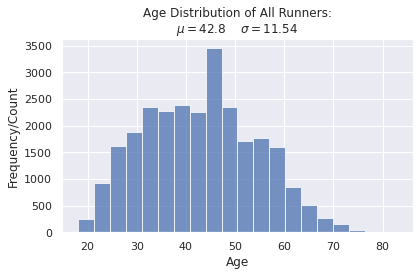

In [6]:
mu = df['Age'].mean()
sigma = np.std(df['Age'])
n_bins = 20

fig, ax = plt.subplots()
ax.hist(df['Age'], bins = n_bins, alpha = 0.75)
ax.set_title("Age Distribution of All Runners:"'\n$\mu = $' + str(round(mu, 2)) + '    $\sigma = $' + str(round(sigma, 2)))
ax.set_ylabel('Frequency/Count')
ax.set_xlabel('Age')
fig.tight_layout()
plt.show()

***Age Distribution of Male and Female Runners*

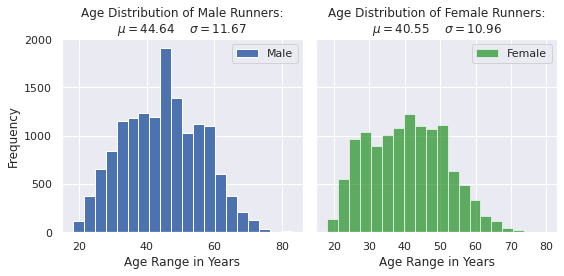

In [7]:
males = df[df['Gender'] == 'M']
females = df[df['Gender'] == 'F']

M_mu = males['Age'].mean()
M_sigma = np.std(males['Age'])

F_mu = females['Age'].mean()
F_sigma = np.std(females['Age'])

fig, axs = plt.subplots(1, 2, figsize = (8,4), sharey = True, tight_layout = True)

axs[0].hist(males['Age'], label = 'Male', bins = 20)
axs[0].set_title("Age Distribution of Male Runners:"'\n$\mu = $' + str(round(M_mu, 2)) + '    $\sigma = $' + str(round(M_sigma, 2)))
axs[0].set_xlabel('Age Range in Years')
axs[0].set_ylabel('Frequency')
axs[0].legend(loc = 'upper right')

axs[1].hist(females['Age'], alpha = .6, color = 'green', label = 'Female', bins = 20)
axs[1].set_title("Age Distribution of Female Runners:"'\n$\mu = $' + str(round(F_mu, 2)) + '    $\sigma = $' + str(round(F_sigma, 2)))
axs[1].set_xlabel('Age Range in Years')
axs[1].legend(loc = 'upper right')
plt.show()

### Breakdown of Male and Female Runners

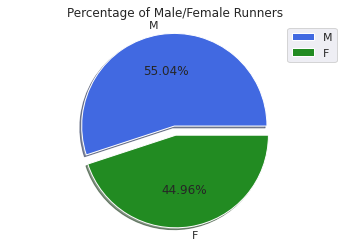

In [8]:
gender = df['Gender'].value_counts(normalize = True)
gender

fig, ax = plt.subplots()
ax.pie(gender, explode = (0.0, 0.1), labels = gender.index, autopct = '%1.2f%%', 
       shadow = True, colors = ('royalblue','forestgreen'))
ax.axis('equal')
ax.set_title('Percentage of Male/Female Runners')
ax.legend()
plt.show()

### Top 5 Fielded Countries by Gender

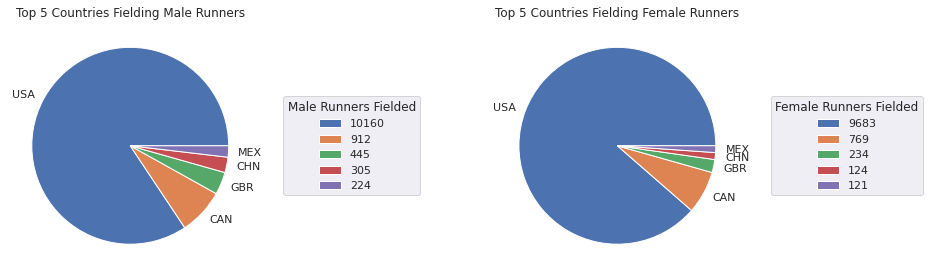

In [9]:
female_field = females['Country_code'].value_counts().head(5)
male_field = males['Country_code'].value_counts().head(5)


fig, ax = plt.subplots(1,2, figsize = (15,4))

#Plotting Male Field
ax[0].pie(male_field, labels = male_field.index)
ax[0].legend(male_field,
            title = 'Male Runners Fielded',
            loc = 'center left',
            bbox_to_anchor=(1.1, 0, 0.5, 1))
ax[0].set_title('Top 5 Countries Fielding Male Runners')

#Plotting Female field
ax[1].pie(female_field, labels = female_field.index)
ax[1].legend(female_field,
            title = 'Female Runners Fielded',
            loc = 'center left',
            bbox_to_anchor=(1.1, 0, 0.5, 1))
ax[1].set_title('Top 5 Countries Fielding Female Runners')


plt.tight_layout()
plt.show()

### Top 20 Finishes: Men's Division

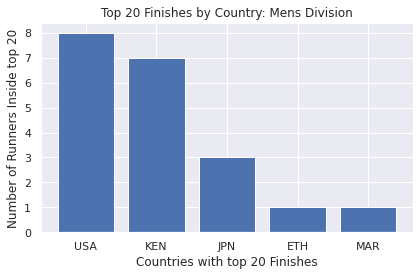

In [10]:
top20 = males.iloc[:20].Country_code.value_counts()


fig, ax = plt.subplots(tight_layout = True)
ax.bar(top20.index, top20)
ax.set_title('Top 20 Finishes by Country: Mens Division')
ax.set_ylabel('Number of Runners Inside top 20')
ax.set_xlabel('Countries with top 20 Finishes')
plt.show()

### Percentage of Fielded Runners by Country finishing in top 20
***50% of Ethiopian Men and 77.78% of Kenyan Men finished in top 20***

In [11]:
male_field2 = males['Country_code'].value_counts()

for country in top20.index:
    if country in male_field:
        x = pd.DataFrame(top20/male_field2)
        
x.dropna(inplace = True)
x.sort_values(by = 'Country_code', ascending = False)

,Country_code
KEN,0.777778
ETH,0.500000
MAR,0.083333
JPN,0.017964
USA,0.000787


### Top 20 Finishes: Women's Division

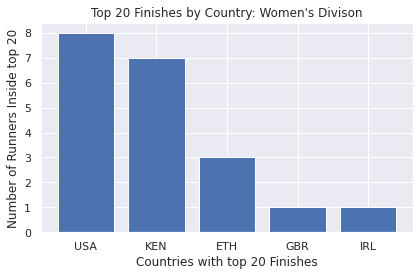

In [12]:
top20F = females.iloc[:20].Country_code.value_counts()


fig, ax = plt.subplots(tight_layout = True)
ax.bar(top20F.index, top20)
ax.set_title('Top 20 Finishes by Country: Women\'s Divison')
ax.set_ylabel('Number of Runners Inside top 20')
ax.set_xlabel('Countries with top 20 Finishes')
plt.show()

### Percentage of Fielded Runners by Country finishing in top 20
***100% of Ethiopian Women and 71.43% of Kenyan Women finished in top 20***

In [13]:
female_field2 = females['Country_code'].value_counts()

for country in top20.index:
    if country in female_field:
        x = pd.DataFrame(top20F/female_field2)
        
x.dropna(inplace = True)
x.sort_values(by = 'Country_code', ascending = False)

,Country_code
ETH,1.000000
KEN,0.714286
IRL,0.027027
GBR,0.004274
USA,0.001033


### Observing Data of American Men
**Looks like Country_code "USA" includes runners from other Countries.**

In [14]:
usa_men = males.loc[males['Country_code'] == 'USA']
usa_men.Country.value_counts()

United States     9507
Canada              70
Mexico              61
United Kingdom      61
China               58
                  ... 
Kenya                1
Nepal                1
Eritrea              1
Uruguay              1
Ukraine              1
Name: Country, Length: 81, dtype: int64

In [15]:
usa_men2 = males.loc[(males['Country_code'] == 'USA') & (males['Country'] == 'United States')]
usa_men2

,Age,Gender,Rank_Gender,Country,Country_code,Result_hr,Result_sec
Rank_Tot,,,,,,,
7,27,M,7,United States,USA,02:09:09,7749
8,30,M,8,United States,USA,02:09:25,7765
11,35,M,11,United States,USA,02:11:51,7911
13,35,M,13,United States,USA,02:12:40,7960
15,34,M,15,United States,USA,02:13:11,7991
...,...,...,...,...,...,...,...
26645,35,M,14667,United States,USA,06:26:58,23218
26646,69,M,14668,United States,USA,06:31:32,23492
26647,21,M,14669,United States,USA,06:32:44,23564


In [16]:
bins = [18,20,30,40,50,60,70,80,90]
ranges = ['U20','20-29','30-39','40-49','50-59','60-69','70-79','80-89']
usa_men2['age_range'] = pd.cut(usa_men2['Age'], bins = bins, labels = ranges, right = False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


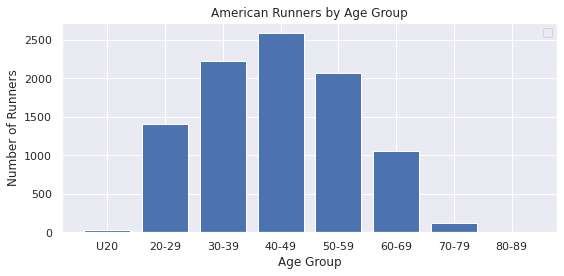

In [17]:
ages = usa_men2['age_range'].value_counts().sort_index()

fig, ax = plt.subplots(figsize = (8,4))
ax.bar(ages.index, height = ages.values)
ax.set_title('American Runners by Age Group')
ax.set_ylabel('Number of Runners')
ax.set_xlabel('Age Group')
ax.legend()
fig.tight_layout()
plt.show()


### Time Distributions by Age Group

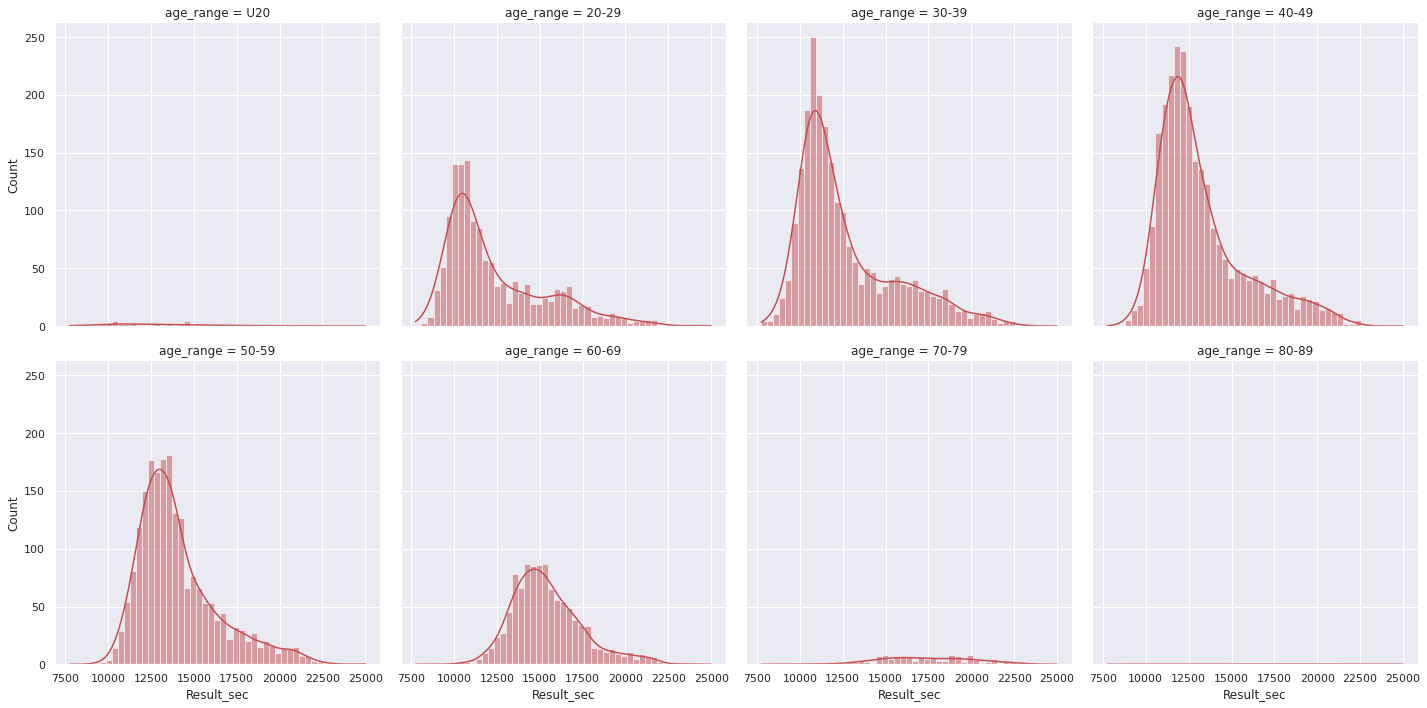

In [18]:
sns.displot(data = usa_men2, x = 'Result_sec', col = 'age_range', col_wrap = 4, kde = True, color = ('r'))
plt.show()

<AxesSubplot:xlabel='Result_sec', ylabel='Density'>

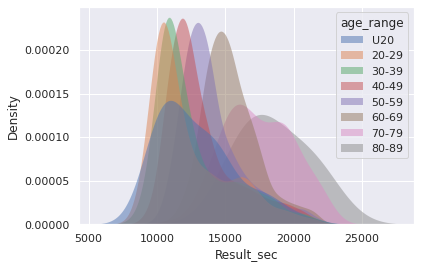

In [19]:
sns.kdeplot(data = usa_men2, x = 'Result_sec', hue = 'age_range', fill = True, common_norm = False, alpha = 0.5, linewidth = 0)


In [20]:
ageStats = usa_men2.groupby('age_range').describe()['Result_sec']
ageStats

,count,mean,std,min,25%,50%,75%,max
age_range,,,,,,,,
U20,35.0,12916.114286,2814.283409,9569.0,10482.00,12096.0,14538.5,20463.0
20-29,1404.0,12365.107550,2886.552065,7749.0,10285.25,11260.5,13944.5,24476.0
30-39,2229.0,12649.726335,2852.288642,7765.0,10669.00,11619.0,14067.0,23218.0
40-49,2593.0,13247.415735,2588.536441,8336.0,11460.00,12430.0,14273.0,22276.0
50-59,2068.0,14079.082689,2356.898455,9503.0,12473.00,13497.5,15128.0,25004.0
60-69,1055.0,15424.851185,2032.048202,10420.0,14028.00,15125.0,16523.0,23492.0
70-79,120.0,17420.841667,2504.825373,10730.0,15477.00,17216.0,19222.5,22504.0
80-89,3.0,18554.000000,2613.523101,16252.0,17133.50,18015.0,19705.0,21395.0
